# 共享单车骑行量数据探索


In [58]:
# -*- coding:utf-8 -*-
import sys
#reload(sys)
#sys.setdefaultencoding("utf-8")

## 导入必要的工具包

In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 读取数据

In [67]:
#dpath = "./data/"
df = pd.read_csv("day.csv")

#显示前5行
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

## 数据总体信息

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


一、样本数N = 731

二、特征维数:13
1.instant记录号
2.dteday：日期
3.season：季节（1=春天、2=夏天、3=秋天、4=冬天）
4.yr：年份，(0: 2011, 1:2012)
5.mnth：月份( 1 to 12)
6.holiday：是否是节假日（0/1）
7.weekday：星期中的哪天，取值为0～6
8.workingday：是否工作日（0/1）1=工作日 （是否为工作日，1为工作日，0为非周末或节假日）
9.weathersit：天气（1：晴天，多云 2：雾天，阴天 3：小雪，小雨 4：大雨，大雪，大雾）
10.temp：气温摄氏度
11.atemp：体感温度
12.hum：湿度
13.windspeed：风速

三、标签y:
casual：非注册用户贡献的骑行量（作业无需理会该字段）
registered：注册用户贡献的骑行量（作业无需理会该字段）
cnt：给定日期（天, day.csv）的总租车人数，响应变量y

In [68]:
#删除instant和dteday
df = df.drop(['instant', 'dteday'], axis = 1)
print(df.shape)

(731, 14)


In [69]:
print(df.columns)

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')


## 数据探索

在数据集中，
不参与计算的特征为:
    1.instant记录号
    2.dteday：日期
类别型特征为：
    3.season：季节（1=春天、2=夏天、3=秋天、4=冬天）
    4.yr：年份，(0: 2011, 1:2012)
    5.mnth：月份( 1 to 12)
    6.holiday：是否是节假日（0/1）
    7.weekday：星期中的哪天，取值为0～6
    8.workingday：是否工作日（0/1）1=工作日 （是否为工作日，1为工作日，0为非周末或节假日）
    9.weathersit：天气（1：晴天，多云 2：雾天，阴天 3：小雪，小雨 4：大雨，大雪，大雾）
数值型特征:
    10.temp：气温摄氏度
    11.atemp：体感温度
    12.hum：湿度
    13.windspeed：风速
    
标签y： cnt是数值型特征


In [70]:
df.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    0.500684    6.519836    0.028728    2.997264    0.683995   
std      1.110807    0.500342    3.451913    0.167155    2.004787    0.465233   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.544894    0.183051    0.162961    0.142429    0.077498   
min      1.000000    0.059130    0.079070    0.000000    0.022392   
25%      1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    0.498333    0.486733    0.626667    0.180975   
75%      2.000000    0.655417    0.608602    0.730209    0.233214   
max      3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

### 单变量分布分析
对数值型特征绘制直方图(distribution plot)

In [71]:
features = ["temp", "atemp","hum", "windspeed", "cnt"]  #可以一次指定多个特征
df[features].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA4A37ED08>,
      dtype=object)

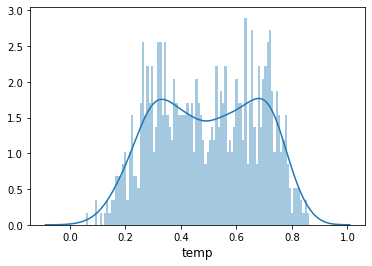

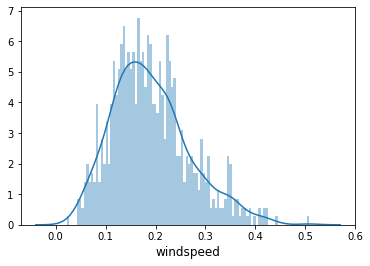

In [29]:
fig1 = plt.figure()
sns.distplot(df["temp"], bins=100, kde=True)
plt.xlabel("temp", fontsize=12)

fig2 = plt.figure()
sns.distplot(df["atemp"], bins=100, kde=True)
plt.xlabel("atemp", fontsize=12)

fig3 = plt.figure()
sns.distplot(df["hum"], bins=100, kde=True)
plt.xlabel('hum', fontsize=12)

fig4 = plt.figure()
sns.distplot(df["windspeed"], bins=100, kde=True)
plt.xlabel('windspeed', fontsize=12)

fig5 = plt.figure()
sns.distplot(df["cnt"], bins=100, kde=True)
plt.xlabel('cnt', fontsize=12)

plt.show()

可以看出，标签y主要集中在4200附近，比较像多个正态分布的混合。

对标签y绘制箱体图和提琴形图

In [31]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["cnt"], ax=axes[0]); 
sns.violinplot(data=df["cnt"], ax=axes[1]);

没看出明显的离群点

类别型特征绘制

#### 频率图

In [46]:
df["season"].value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

#### 条形图countplot

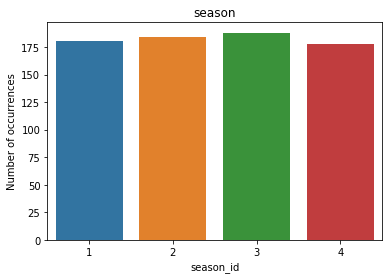

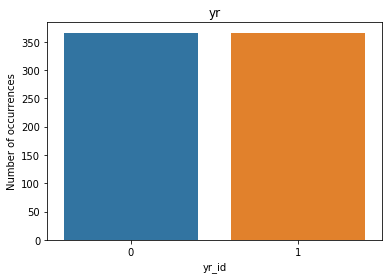

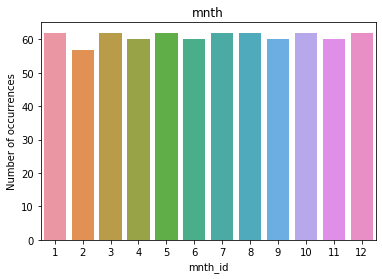

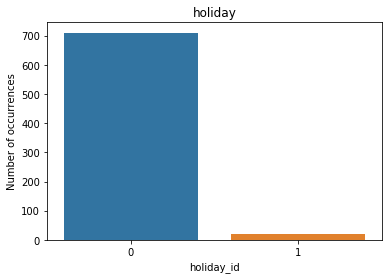

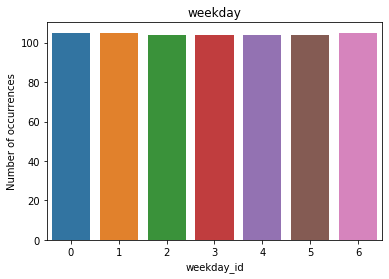

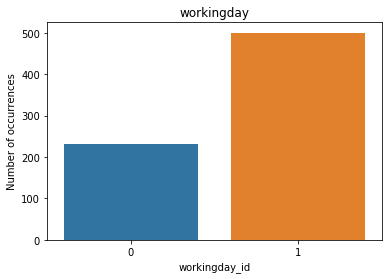

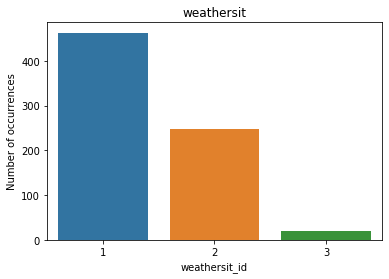

In [48]:
ll = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

for tname in ll:
    plt.figure()
    plt.title(tname)
    sns.countplot(df[tname]);
    plt.xlabel("%s_id" % tname);
    plt.ylabel("Number of occurrences");

plt.show()

从天气图看出，出现次数较多在晴天和阴天，小雪小雨天出现次数很少，在大雨天没有出现
从是否工作日图看出，工作日出现次数较多
从星期中的哪天图看出，出现次数都很平均
从节假日图看出，基本都在非节假日出现
从月份图看出，出现次数都很平均
从年份图看出，出现次数都很平均
从季节图看出，出现次数都很平均，秋天稍微多一点点

## 两两特征之间的相关性

In [72]:
# Calculates pearson co-efficient for all combinations，通常认为相关系数大于0.5的为强相关
data_corr = df.corr()

In [73]:
data_corr.shape

(14, 14)

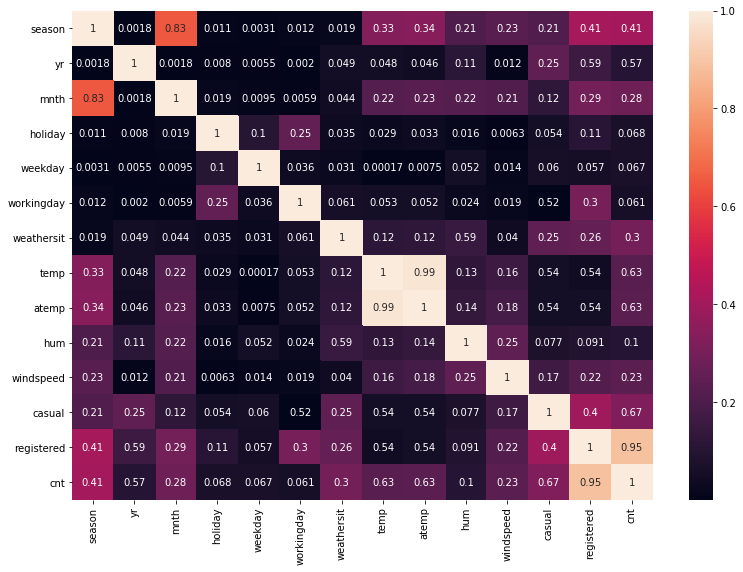

In [74]:
# 得到相关系数的绝对值，通常认为相关系数的绝对值大于0.5的特征为强相关
data_corr = data_corr.abs()
plt.subplots(figsize=(13, 9))
sns.heatmap(data_corr,annot=True)

# Mask unimportant features,突出重要信息
sns.heatmap(data_corr, mask=data_corr < 0.5, cbar=False)

#plt.savefig("house_coor.png" )
plt.show()

In [76]:
cols = df.columns 
#Set the threshold to select only highly correlated attributes
threshold = 0.5
# List of pairs along with correlation above threshold
corr_list = []
#size = data.shape[1]
size = data_corr.shape[0]

#Search for the highly correlated pairs
for i in range(0, size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -x[0])

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

temp and atemp = 0.99
registered and cnt = 0.95
season and mnth = 0.83
casual and cnt = 0.67
atemp and cnt = 0.63
temp and cnt = 0.63
yr and registered = 0.59
weathersit and hum = 0.59
yr and cnt = 0.57
atemp and registered = 0.54
atemp and casual = 0.54
temp and casual = 0.54
temp and registered = 0.54
workingday and casual = 0.52


### 散点图(对两个数值型特征)

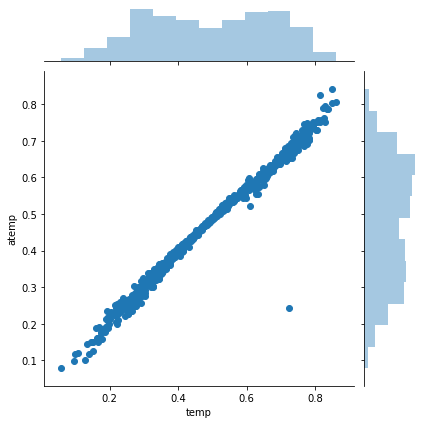

In [84]:
#temp and atemp = 0.99      温度和体感温度相关性极高
sns.jointplot(x="temp", y="atemp", data=df, kind="scatter");

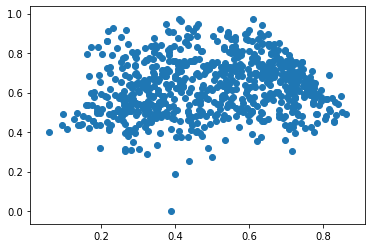

In [81]:
#temp hum  0.13   温度和湿度关系不大
plt.scatter(df["temp"], df["hum"]);

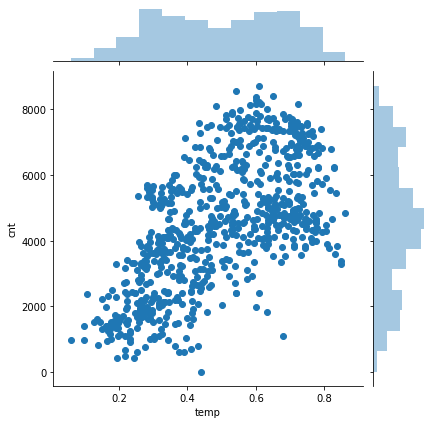

In [85]:
#temp and cnt = 0.63 温度和骑行量  温度低，骑行量就低，反之高
sns.jointplot(x="temp", y="cnt",data=df, kind="scatter");

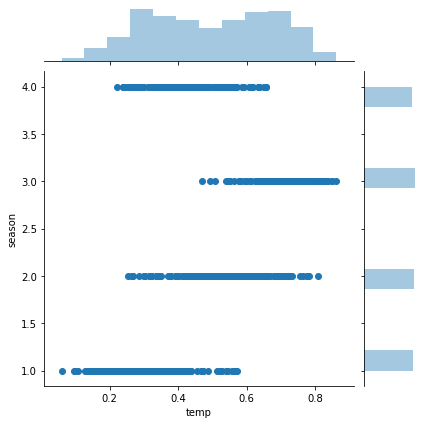

In [87]:
#sns.jointplot(x="temp", y="cnt",data=df, kind="scatter");
#夏天的温度居然比秋天的温度低一些
sns.jointplot(x="temp", y="season",data=df, kind="scatter");

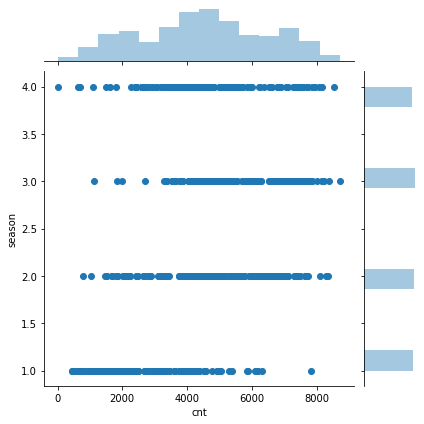

In [89]:
#明显春天的骑行量会比其他三个季度的要少
sns.jointplot(x="cnt", y="season",data=df, kind="scatter");

### 数值特征——类别特征  散点图和箱型图和小提琴图

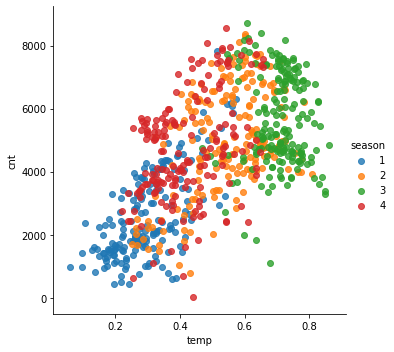

In [90]:
#temp and cnt = 0.63 温度和骑行量  温度低，骑行量就低，反之高。加上类别型特征season
sns.lmplot('temp', 'cnt', data=df, hue='season', fit_reg=False);

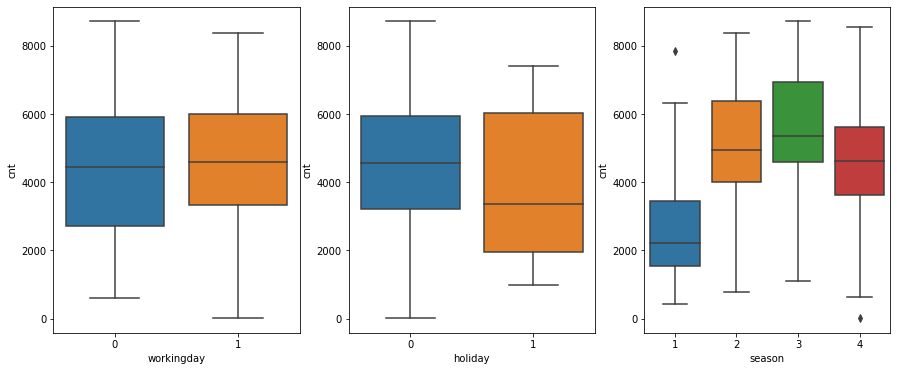

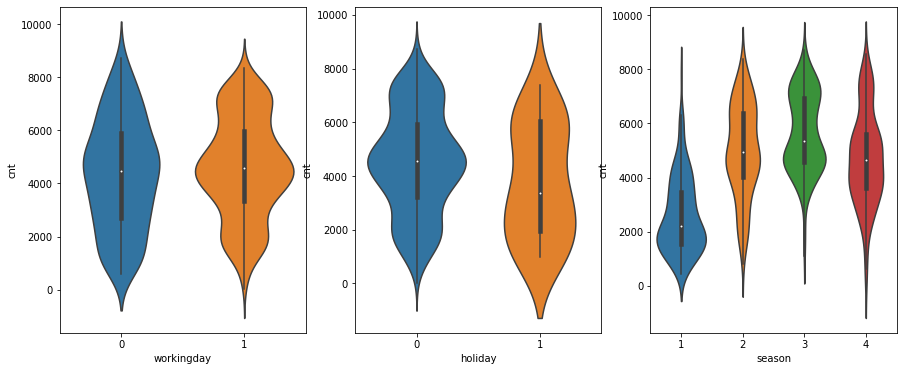

In [101]:
 _, axes = plt.subplots(1, 3, sharey=False, figsize=(15, 6)) 
sns.boxplot(x="workingday", y="cnt", data=df,ax=axes[0]) 
sns.boxplot(x="holiday", y="cnt", data=df,ax=axes[1]) 
sns.boxplot(x="season", y="cnt", data=df,ax=axes[2]) 

 _, axes = plt.subplots(1, 3, sharey=False, figsize=(15, 6)) 
sns.violinplot(x="workingday", y="cnt", data=df, ax=axes[0]);
sns.violinplot(x="holiday", y="cnt", data=df, ax=axes[1]);
sns.violinplot(x="season", y="cnt", data=df, ax=axes[2]);